## **Data Preparation**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

!pip install category_encoders==2.6.0
!pip install pandoc

In [2]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [3]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('/Users/aishwaryaadiki/Downloads/SBA_loans_train.csv')
X_test  = pd.read_csv('/Users/aishwaryaadiki/Downloads/SBA_loans_test.csv')
orig_columns = list(X_train.columns)



In [4]:
print(orig_columns)

['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Defaulted']


In [5]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (337186, 20)
Test shape: (112396, 20)


**Review dataset**

In [6]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,22069,object,1,30,"{'LOS ANGELES': 4278, 'HOUSTON': 3801, 'NEW YO..."
1,State,51,object,2,3,"{'CA': 49031, 'TX': 26500, 'NY': 21508, 'FL': ..."
2,Zip,26044,int64,1,5,"{90015: 344, 10001: 328, 93401: 308, 33166: 26..."
3,Bank,4833,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 32382, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 44497, 'NC': 29717, 'IL': 24674, 'OH': ..."
5,NAICS,1279,int64,1,6,"{0: 75763, 722110: 10456, 722211: 7319, 811111..."
6,Term,372,int64,1,3,"{84: 86087, 60: 33770, 240: 32245, 120: 29056,..."
7,NoEmp,433,int64,1,4,"{1: 57553, 2: 51865, 3: 34228, 4: 27633, 5: 22..."
8,NewExist,3,float64,3,3,"{1.0: 241894, 2.0: 94857, 0.0: 389}"
9,CreateJob,180,int64,1,4,"{0: 236015, 1: 23537, 2: 21779, 3: 10849, 4: 7..."


In [7]:
X_train.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
count,337186.000000,337186.000000,337186.000000,337186.000000,337140.000000,337186.000000,337186.000000,337186.000000,337186.000000,3.371860e+05,337186.000000,3.371860e+05,3.371860e+05,337186.000000
mean,53839.723945,398565.095974,110.888984,11.310229,1.280204,8.590790,10.977176,2754.662685,0.758050,2.021301e+05,5.643016,1.935411e+05,1.501295e+05,0.175191
std,31173.277974,263305.463724,78.951681,68.753263,0.451661,239.591219,240.184246,12749.672453,0.646786,2.892966e+05,2232.801967,2.847135e+05,2.293072e+05,0.380131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+02,1.000000e+02,0.000000
25%,27604.250000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.201250e+04,0.000000,3.500000e+04,2.125000e+04,0.000000
50%,55414.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,9.000000e+04,6.210000e+04,0.000000
75%,83706.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.400000e+05,0.000000,2.270000e+05,1.750000e+05,0.000000
max,99999.000000,928120.000000,505.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.100000e+07,996262.000000,5.000000e+06,4.869000e+06,1.000000


In [8]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0


Explore levels and counts in the `RevLineCr` column. As we can see, some column values needs to be "cleaned"

In [9]:
desc_df.iloc[13]["Level_Values"]

{'N': 157494,
 '0': 96923,
 'Y': 75248,
 'T': 5797,
 'R': 7,
 '1': 6,
 '`': 2,
 '2': 1,
 ',': 1,
 '7': 1,
 'A': 1,
 '-': 1,
 'Q': 1}

#### **Replace missing values for all columns for both X_train and X_test. Replace Na's with zero for numerical variables and with "Missing" for categorical**

In [10]:
import pandas as pd

categorical_columns=X_train.select_dtypes(include=['object']).columns
X_train[categorical_columns]=X_train[categorical_columns].fillna('Missing')
X_test[categorical_columns]=X_test[categorical_columns].fillna('Missing')

X_train=X_train.fillna(0)
X_test=X_test.fillna(0)


    


X_train[X_train['State'] == 'Missing']

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
10625,A452638533,Missing,76645,PROSPERITY BANK,TX,0,120,3,1.0,0,0,1,0,N,N,100000.0,0.0,100000.0,80000.0,0
111315,"BOX 267, APO AP",Missing,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,73,8,1.0,0,0,0,0,N,N,50000.0,0.0,50000.0,45000.0,1
122504,CASCO,Missing,54205,UNION STATE BANK,WI,0,204,8,1.0,0,0,1,0,N,N,300000.0,0.0,300000.0,252600.0,0
122900,SALT LAKE CITY,Missing,84124,ZIONS FIRST NATIONAL BANK,UT,448310,60,4,1.0,0,0,1,0,N,N,250000.0,0.0,250000.0,212500.0,0
229169,SOMERSET,Missing,54025,FIRST BANK OF BALDWIN,WI,0,240,7,1.0,0,0,1,0,N,N,82000.0,0.0,82000.0,73800.0,0
287695,A452638533,Missing,76052,PROSPERITY BANK,TX,235610,84,3,1.0,0,0,1,0,N,Y,80000.0,0.0,80000.0,64000.0,0


In [11]:
y_train = X_train["Defaulted"]
y_test = X_test["Defaulted"]

##  Because I am going to use the Decision Tree approach, I will not use One-Hot encoding. Instead, I will utilize  Label encoding, Target encoding and Weight of Evidence encoding.  

For Target encoding and WOE, use `category_encoders` library.

goal is to determine which approach works better with the given dataset.

Consider following variables to be Categorical:
- "City"  has  22070  values
- "State"  has  52  values
- "Bank"  has  4834  values
- "BankState"  has  56  values
- "RevLineCr"  has  14  values
- "LowDoc"  has  8  values

For the categorical variables listed above, use the three types of categorical variables encoders:  
- Use LabelEncoder from `sklearn.preprocessing` 
- Use Target encoding from here: https://contrib.scikit-learn.org/category_encoders/targetencoder.html 
- Use WOE encoder from here: https://contrib.scikit-learn.org/category_encoders/woe.html 

Take following steps with encoders:
   - Target and WOE:
        - Define encoder
        - Fit encoder on training data only
        - Transform Train/test datasets separately
   - Label Encoder:
        - Fit Label encoder on the combination of train/test data or modify logic of Label encoder to handle unseen valid values
        - If you decide to fit the encoder on Training data only, make sure you have treatment for unseen values: values that present in Test dataset but not in Train dataset
        - Transform Train/test datasets separately

For each encoder, give new column names "Original-name"_le (for Label encoder), "Original-name"_te for target-encoder and "Original-name"_woe for WOE encoder. After encoding, your train/test dataframes will have all the original columns, plus new columns with encoded values.

Save fitted encoders (Label, TE and WOE) in the Python dictionary named `cat_encoders`.
The key in the `cat_encoders` will be Python set with (column-name, encoder-type). For example, `("City","le")`
Saved encoders will be handy when you try to score trained model on unseen data that has to be transformed before scoring.

In [12]:
import pandas as pd 
import category_encoders as ce 


# Defining Target Encoder
target_encoder=ce.TargetEncoder(cols=categorical_columns)

# Fitting Target Encoder on training data only
target_encoder.fit(X_train[categorical_columns],X_train['Defaulted'])

# Transforming Train/test datasets separately
X_train_te = target_encoder.transform(X_train[categorical_columns])
X_test_te = target_encoder.transform(X_test[categorical_columns])

display(X_train.join(target_encoder.transform(X_train[categorical_columns]), lsuffix='', rsuffix='_te')) #_te columns appended to the very right of the data frame, so please scroll
display(X_test.join(target_encoder.transform(X_test[categorical_columns]), lsuffix='', rsuffix='_te')) #_te columns appended to the very right of the data frame, so please scroll
#display(X_train_te)


,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_te,State_te,Bank_te,BankState_te,RevLineCr_te,LowDoc_te
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1,0.283212,0.167744,0.308181,0.158105,0.146342,0.186457
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1,0.191919,0.200634,0.138341,0.221678,0.146342,0.186457
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0,0.125985,0.096586,0.062502,0.076696,0.149252,0.090740
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1,0.351182,0.200634,0.059406,0.068197,0.253136,0.186457
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0,0.275805,0.179574,0.362410,0.101741,0.149252,0.090740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337181,ROCHESTER,MN,55901,TWIN CITIES-METRO CERT. DEVEL,MN,722410,240,8,1.0,4,8,1,2,0,N,388000.0,0.0,388000.0,388000.0,0,0.135514,0.115061,0.000000,0.075003,0.149252,0.186457
337182,STATEN ISLAND,NY,10301,BANK OF AMERICA NATL ASSOC,NC,445110,36,4,2.0,0,4,0,1,Y,N,31500.0,0.0,31500.0,15750.0,0,0.312500,0.198531,0.274257,0.292392,0.253136,0.186457
337183,Montgomeryville,PA,18936,UNITY BANK,NJ,311811,120,2,2.0,15,0,25650,1,N,N,720000.0,0.0,720000.0,540000.0,0,0.150340,0.143651,0.110039,0.091828,0.146342,0.186457
337184,HAYDEN,ID,83835,MOUNTAIN W. BANK A DIVISION OF,ID,441229,84,2,1.0,1,1,1,1,Y,N,210282.0,0.0,110000.0,55000.0,0,0.211049,0.149706,0.186969,0.101227,0.253136,0.186457


,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_te,State_te,Bank_te,BankState_te,RevLineCr_te,LowDoc_te
0,RANTOUL,IL,61866,BUSEY BANK,IL,0,84,1,2.0,0,0,1,0,N,Y,42000.0,0.0,42000.0,33600.0,0,0.146713,0.224163,7.359307e-02,0.222704,0.146342,0.090740
1,BOISE,ID,83704,WELLS FARGO BANK NATL ASSOC,SD,0,84,7,1.0,0,0,1,0,N,N,15000.0,0.0,15000.0,13500.0,0,0.128531,0.149706,1.383407e-01,0.175423,0.146342,0.186457
2,CAROL STREAM,IL,60188,"SOMERCOR 504, INC.",IL,0,240,19,1.0,15,0,1,0,N,N,497000.0,0.0,497000.0,497000.0,0,0.170526,0.224163,6.630936e-13,0.222704,0.146342,0.186457
3,SOMERSWORTH,NH,3878,CITIZENS BANK NATL ASSOC,NH,235610,84,21,1.0,0,21,1,1,Y,N,20000.0,0.0,20000.0,10000.0,0,0.071290,0.106169,2.131563e-01,0.059538,0.253136,0.186457
4,CHERRY HILL,NJ,8002,CITIZENS BANK NATL ASSOC,RI,541511,84,2,2.0,1,3,1,1,N,N,100000.0,0.0,100000.0,50000.0,0,0.152901,0.202302,2.131563e-01,0.195855,0.146342,0.186457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112391,HURRICANE,WV,25526,"WESBANCO BANK, INC.",WV,0,60,6,1.0,0,0,1,0,N,Y,23269.0,0.0,24700.0,19760.0,0,0.244749,0.173534,1.755319e-01,0.156785,0.146342,0.090740
112392,ADA,OK,74820,VISION BANK NATL ASSOC,OK,722211,78,2,1.0,10,0,1,2,0,N,120000.0,0.0,120000.0,60000.0,1,0.180399,0.151976,1.419739e-01,0.111435,0.149252,0.186457
112393,LA MIRADA,CA,90638,BBCN BANK,CA,621999,78,1,2.0,0,0,0,1,N,N,20000.0,0.0,20000.0,17000.0,1,0.256544,0.183761,5.554282e-01,0.221678,0.146342,0.186457
112394,LOS ANGELES,CA,90021,CAPITAL ONE NATL ASSOC,VA,315212,84,3,1.0,4,3,0,1,N,N,25000.0,0.0,25000.0,12500.0,0,0.272090,0.183761,4.132886e-01,0.382280,0.146342,0.186457


In [13]:
import pandas as pd 
import category_encoders as ce 


# Defining Target Encoder
woe_encoder=ce.WOEEncoder(cols=categorical_columns)

# Fitting Target Encoder on training data only
woe_encoder.fit(X_train[categorical_columns],X_train['Defaulted'])

# Transforming Train/test datasets separately
X_train_woe=woe_encoder.transform(X_train[categorical_columns])
X_test_woe=woe_encoder.transform(X_test[categorical_columns])

display(X_train.join(woe_encoder.transform(X_train[categorical_columns]), lsuffix='', rsuffix='_woe')) #_woe columns appended to the very right of the data frame, so please scroll
display(X_test.join(woe_encoder.transform(X_test[categorical_columns]), lsuffix='', rsuffix='_woe')) #_woe columns appended to the very right of the data frame, so please scroll
#display(X_train_woe)


,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_woe,State_woe,Bank_woe,BankState_woe,RevLineCr_woe,LowDoc_woe
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1,1.107415,-0.050917,0.741374,-0.122172,-0.214300,0.076065
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1,0.118312,0.167471,-0.279641,0.293405,-0.214300,0.076065
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0,-0.336038,-0.682359,-1.049319,-0.930088,-0.191171,-0.755151
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1,1.063740,0.167471,-1.162305,-1.056343,0.467327,0.076065
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0,0.622485,0.031247,1.072323,-0.624053,-0.191171,-0.755151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337181,ROCHESTER,MN,55901,TWIN CITIES-METRO CERT. DEVEL,MN,722410,240,8,1.0,4,8,1,2,0,N,388000.0,0.0,388000.0,388000.0,0,-0.298020,-0.489985,-4.474200,-0.961358,-0.191171,0.076065
337182,STATEN ISLAND,NY,10301,BANK OF AMERICA NATL ASSOC,NC,445110,36,4,2.0,0,4,0,1,Y,N,31500.0,0.0,31500.0,15750.0,0,0.770578,0.153921,0.576189,0.665518,0.467327,0.076065
337183,Montgomeryville,PA,18936,UNITY BANK,NJ,311811,120,2,2.0,15,0,25650,1,N,N,720000.0,0.0,720000.0,540000.0,0,0.450635,-0.235603,-0.525874,-0.739523,-0.214300,0.076065
337184,HAYDEN,ID,83835,MOUNTAIN W. BANK A DIVISION OF,ID,441229,84,2,1.0,1,1,1,1,Y,N,210282.0,0.0,110000.0,55000.0,0,0.278785,-0.186123,0.090980,-0.629058,0.467327,0.076065


,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_woe,State_woe,Bank_woe,BankState_woe,RevLineCr_woe,LowDoc_woe
0,RANTOUL,IL,61866,BUSEY BANK,IL,0,84,1,2.0,0,0,1,0,N,Y,42000.0,0.0,42000.0,33600.0,0,-0.242512,0.307960,-0.931019,0.299400,-0.214300,-0.755151
1,BOISE,ID,83704,WELLS FARGO BANK NATL ASSOC,SD,0,84,7,1.0,0,0,1,0,N,N,15000.0,0.0,15000.0,13500.0,0,-0.355452,-0.186123,-0.279641,0.001810,-0.214300,0.076065
2,CAROL STREAM,IL,60188,"SOMERCOR 504, INC.",IL,0,240,19,1.0,15,0,1,0,N,N,497000.0,0.0,497000.0,497000.0,0,0.057593,0.307960,-4.099727,0.299400,-0.214300,0.076065
3,SOMERSWORTH,NH,3878,CITIZENS BANK NATL ASSOC,NH,235610,84,21,1.0,0,21,1,1,Y,N,20000.0,0.0,20000.0,10000.0,0,-0.848648,-0.579384,0.243506,-1.204155,0.467327,0.076065
4,CHERRY HILL,NJ,8002,CITIZENS BANK NATL ASSOC,RI,541511,84,2,2.0,1,3,1,1,N,N,100000.0,0.0,100000.0,50000.0,0,-0.092980,0.177694,0.243506,0.137070,-0.214300,0.076065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112391,HURRICANE,WV,25526,"WESBANCO BANK, INC.",WV,0,60,6,1.0,0,0,1,0,N,Y,23269.0,0.0,24700.0,19760.0,0,0.471689,-0.007940,0.025752,-0.126290,-0.214300,-0.755151
112392,ADA,OK,74820,VISION BANK NATL ASSOC,OK,722211,78,2,1.0,10,0,1,2,0,N,120000.0,0.0,120000.0,60000.0,1,0.162953,-0.168494,-0.242512,-0.524068,-0.191171,0.076065
112393,LA MIRADA,CA,90638,BBCN BANK,CA,621999,78,1,2.0,0,0,0,1,N,N,20000.0,0.0,20000.0,17000.0,1,0.543726,0.058264,1.771824,0.293405,-0.214300,0.076065
112394,LOS ANGELES,CA,90021,CAPITAL ONE NATL ASSOC,VA,315212,84,3,1.0,4,3,0,1,N,N,25000.0,0.0,25000.0,12500.0,0,0.565739,0.058264,1.198946,1.069458,-0.214300,0.076065


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

# Defining Label Encoder
label_encoder = MultiColumnLabelEncoder(columns = categorical_columns)

# Fitting  Label encoder on train data
Fitted_le = label_encoder.fit(X_train[categorical_columns])

# Transforming Train/test datasets separately
# X_train_le = X_train.join(Fitted_le.transform(X_train[categorical_columns]), lsuffix='', rsuffix='_te')
X_train_le = Fitted_le.transform(X_train[categorical_columns])
#X_test_le = X_test.join(Fitted_le.transform(X_test[categorical_columns]), lsuffix='', rsuffix='_te')
X_test_le = Fitted_le.transform(X_test[categorical_columns])

display(X_train.join(Fitted_le.transform(X_train[categorical_columns]), lsuffix='', rsuffix='_te')) #_le columns appended to the very right of the data frame, so please scroll
display(X_test.join(Fitted_le.transform(X_test[categorical_columns]), lsuffix='', rsuffix='_te')) #_le columns appended to the very right of the data frame, so please scroll
#display(X_train_le.shape)

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_te,State_te,Bank_te,BankState_te,RevLineCr_te,LowDoc_te
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1,8969,1,751,11,8,4
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1,17402,3,4703,5,8,4
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0,948,21,355,23,2,7
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1,666,3,3099,4,12,4
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0,7935,18,659,20,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337181,ROCHESTER,MN,55901,TWIN CITIES-METRO CERT. DEVEL,MN,722410,240,8,1.0,4,8,1,2,0,N,388000.0,0.0,388000.0,388000.0,0,16427,23,4478,25,2,4
337182,STATEN ISLAND,NY,10301,BANK OF AMERICA NATL ASSOC,NC,445110,36,4,2.0,0,4,0,1,Y,N,31500.0,0.0,31500.0,15750.0,0,18420,35,379,30,12,4
337183,Montgomeryville,PA,18936,UNITY BANK,NJ,311811,120,2,2.0,15,0,25650,1,N,N,720000.0,0.0,720000.0,540000.0,0,12957,39,4563,34,8,4
337184,HAYDEN,ID,83835,MOUNTAIN W. BANK A DIVISION OF,ID,441229,84,2,1.0,1,1,1,1,Y,N,210282.0,0.0,110000.0,55000.0,0,8140,13,3075,15,12,4


,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_te,State_te,Bank_te,BankState_te,RevLineCr_te,LowDoc_te
0,RANTOUL,IL,61866,BUSEY BANK,IL,0,84,1,2.0,0,0,1,0,N,Y,42000.0,0.0,42000.0,33600.0,0,10095,14,574,14,4,7
1,BOISE,ID,83704,WELLS FARGO BANK NATL ASSOC,SD,0,84,7,1.0,0,0,1,0,N,N,15000.0,0.0,15000.0,13500.0,0,989,13,3589,43,4,4
2,CAROL STREAM,IL,60188,"SOMERCOR 504, INC.",IL,0,240,19,1.0,15,0,1,0,N,N,497000.0,0.0,497000.0,497000.0,0,1693,14,2939,14,4,4
3,SOMERSWORTH,NH,3878,CITIZENS BANK NATL ASSOC,NH,235610,84,21,1.0,0,21,1,1,Y,N,20000.0,0.0,20000.0,10000.0,0,11247,31,772,31,7,4
4,CHERRY HILL,NJ,8002,CITIZENS BANK NATL ASSOC,RI,541511,84,2,2.0,1,3,1,1,N,N,100000.0,0.0,100000.0,50000.0,0,1927,32,772,41,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112391,HURRICANE,WV,25526,"WESBANCO BANK, INC.",WV,0,60,6,1.0,0,0,1,0,N,Y,23269.0,0.0,24700.0,19760.0,0,5493,50,3596,51,4,7
112392,ADA,OK,74820,VISION BANK NATL ASSOC,OK,722211,78,2,1.0,10,0,1,2,0,N,120000.0,0.0,120000.0,60000.0,1,36,37,3539,37,0,4
112393,LA MIRADA,CA,90638,BBCN BANK,CA,621999,78,1,2.0,0,0,0,1,N,N,20000.0,0.0,20000.0,17000.0,1,6233,4,486,4,4,4
112394,LOS ANGELES,CA,90021,CAPITAL ONE NATL ASSOC,VA,315212,84,3,1.0,4,3,0,1,N,N,25000.0,0.0,25000.0,12500.0,0,6751,4,628,47,4,4


In [15]:

len_data=len(X_train)
for col in X_train.drop(columns=['Defaulted']).columns:
    if X_train[col].dtype=='object':
        print("Column ",col," has ",X_train[col].nunique()," values")

Column  City  has  22070  values
Column  State  has  52  values
Column  Bank  has  4834  values
Column  BankState  has  56  values
Column  RevLineCr  has  14  values
Column  LowDoc  has  8  values


## **Training one model for every type of categorical encoding: Label, Target and WOE:**
```
max_depth = 10

dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

```

Report F1, and confusion matrix for each of the 3 models.  
Use F1 score "weighted" : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix

# Defining the maximum depth of the decision tree
max_depth=10


# Training the decision tree model with Label Encoding
dtc_le = DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth=max_depth)
dtc_le.fit(X_train_le,y_train)
y_pred_le=dtc_le.predict(X_test_le)
f1_score_le=f1_score(y_test,y_pred_le,average='weighted')
confusion_matrix_le=confusion_matrix(y_test,y_pred_le)


# Training the decision tree model with Target Encoding
dtc_te = DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth=max_depth)
dtc_te.fit(X_train_te,y_train)
y_pred_te=dtc_te.predict(X_test_te)
f1_score_te=f1_score(y_test,y_pred_te,average='weighted')
confusion_matrix_te=confusion_matrix(y_test,y_pred_te)


# Training the decision tree model with WOE Encoding
dtc_woe=DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth=max_depth)
dtc_woe.fit(X_train_woe,y_train)
y_pred_woe=dtc_woe.predict(X_test_woe)
f1_score_woe=f1_score(y_test,y_pred_woe,average='weighted')
confusion_matrix_woe=confusion_matrix(y_test,y_pred_woe)

In [17]:
print("\nF1 Score (Target Encoding):",f1_score_te)
print("Confusion Matrix (Target Encoding):\n",confusion_matrix_te)
print("\nF1 Score (WOE Encoding):",f1_score_woe)
print("Confusion Matrix (WOE Encoding):\n",confusion_matrix_woe)
print("F1 Score (Label Encoding):",f1_score_le)
print("Confusion Matrix (Label Encoding):\n",confusion_matrix_le)


F1 Score (Target Encoding): 0.8026757602755061
Confusion Matrix (Target Encoding):
 [[89348  3341]
 [15326  4381]]

F1 Score (WOE Encoding): 0.7991992253680227
Confusion Matrix (WOE Encoding):
 [[90380  2309]
 [16010  3697]]
F1 Score (Label Encoding): 0.7452522955852414
Confusion Matrix (Label Encoding):
 [[92559   130]
 [19688    19]]


### **Tuning Decision Tree model to identify hyper-parameters that lead to best performance as measured by F1 score ("weighted") on the Validation dataset.**

Here is Hyper parameter space:  
   - max_depth = [5,10,12,15,20]  
   - min_samples_split = [25, 50, 75]  
   - min_impurity_decrease = [0.0, 0.02, 0.05]  
    
You should train 5x3x3 = 45 models

From the above 45 models, identify best model as measured by F1 score on Validation dataset.  
For the Best model:
- Report set of hyper parameters used to train the model.  
- Report F1 and confusion matrix on **Validation** dataset.  
- Report F1 and confusion matrix on **Test** dataset.


In [18]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, make_scorer 

# Defining the hyperparameter space

param_grid={'max_depth': [5,10,12,15,20],'min_samples_split': [25,50,75],'min_impurity_decrease': [0.0,0.02,0.05]}

# Defining the scoring metric as F1 score
f1_scorer = make_scorer(f1_score,average='weighted')

# Initializing the Decision Tree model

dtc=DecisionTreeClassifier(random_state=0,criterion="entropy")

# Performing Grid Search
grid_search = GridSearchCV(dtc,param_grid,scoring=f1_scorer,cv=5)
grid_search.fit(X_train_te,y_train)

# Getting the best model parameters 
best_params=grid_search.best_params_

# Getting the best F1 score
best_f1=grid_search.best_score_

# Get the confusion matrix for the best model
y_pred=grid_search.predict(X_test_te)
cm=confusion_matrix(y_test,y_pred)
print("Best Parameters:",best_params)
print("Best F1 Score:",best_f1)
print("Confusion Matrix:")
print(cm)

Best Parameters: {'max_depth': 15, 'min_impurity_decrease': 0.0, 'min_samples_split': 75}
Best F1 Score: 0.8215340892217844
Confusion Matrix:
[[89292  3397]
 [15117  4590]]


### **Retraining the model with best params I have identified earlier on full Training dataset.Evaluate model performance on Test dataset**

In [111]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score, make_scorer 

# Defining the hyperparameter space

param_grid={'max_depth': [15],'min_samples_split': [75],'min_impurity_decrease': [0.0]}

# Defining the scoring metric as F1 score
f1_scorer = make_scorer(f1_score,average='weighted')

# Initializing the Decision Tree model

dtc=DecisionTreeClassifier(random_state=0,criterion="entropy")

# Performing Grid Search
grid_search = GridSearchCV(dtc,param_grid,scoring=f1_scorer,cv=5)

# Retraining the model with best params you have identified in Question 4 on full Training dataset.
fullDataX = pd.concat([X_train_te, X_test_te])
fullDataY = pd.concat([y_train, y_test])
grid_search.fit(fullDataX,fullDataY)

# Getting the best model parameters 
best_params=grid_search.best_params_

# Getting the best F1 score
best_f1=grid_search.best_score_

# Evaluating model performance on Test dataset
y_pred=grid_search.predict(X_test_te)
cm=confusion_matrix(y_test,y_pred)
print("Best Parameters:",best_params)
print("Best F1 Score:",best_f1)
print("Confusion Matrix:")
print(cm)

Best Parameters: {'max_depth': 15, 'min_impurity_decrease': 0.0, 'min_samples_split': 75}
Best F1 Score: 0.8174341445433138
Confusion Matrix:
[[89707  2982]
 [14454  5253]]


## Calculating feature importance using permutation method.

In [137]:
YData = pd.concat([X_train, X_test])
#print(YData.shape)
XData = pd.concat([X_train_te, X_test_te])
#XData.shape

City: 0.016660438687023212
State: 0.012932251444298085
Bank: 0.05471665658327101
BankState: 0.025527598846934004
RevLineCr: 0.022705730927553718
LowDoc: 0.0028171227920328703


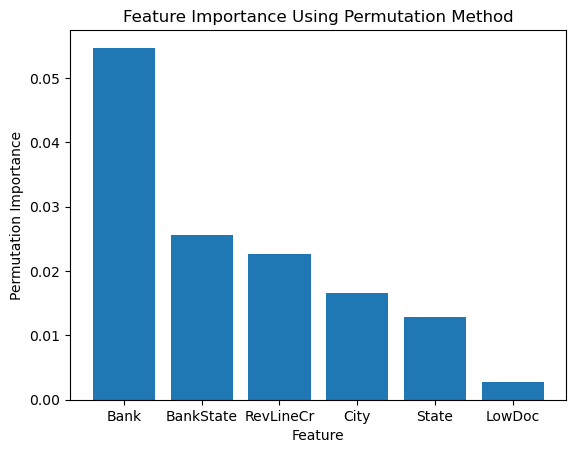

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score, make_scorer

# Sample data loading
# Replace this with your actual data loading code
# Assuming you have X_train_te, X_test_te, y_train, y_test defined

# Defining the hyperparameter space
param_grid = {'max_depth': [15], 'min_samples_split': [75], 'min_impurity_decrease': [0.0]}

# Defining the scoring metric as F1 score
f1_scorer = make_scorer(f1_score, average='weighted')

# Initializing the Decision Tree model
dtc = DecisionTreeClassifier(random_state=0, criterion="entropy")

# Performing Grid Search
grid_search = GridSearchCV(dtc, param_grid, scoring=f1_scorer, cv=5)

# Retraining the model with best params identified in the grid search
grid_search.fit(fullDataX, fullDataY)

# Using the best model from grid search
best_dtc = grid_search.best_estimator_

# Calculate permutation importance using the best model
result = permutation_importance(best_dtc, X_test_te, y_test, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_names = fullDataX.columns

for feature, importance in zip(feature_names, feature_importances):
    print(f'{feature}: {importance}')

# Plotting feature importances
sorted_idx = feature_importances.argsort()[::-1]
plt.bar(range(fullDataX.shape[1]), feature_importances[sorted_idx], tick_label=feature_names[sorted_idx])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Feature Importance Using Permutation Method')
plt.show()
